In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as colors
import matplotlib.text as text
import matplotlib.lines as lines
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
#from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM, z_at_value

c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
cosmo = FlatLambdaCDM(h0, Om0=0.262)

In [3]:
### Samples as of 2/19/19
spec = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_latest.csv')
mac = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_latest.csv')
zoo = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_latest.csv')
zoo_30 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_30_latest.csv')

slacs = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/Bolton_2008_gradeA_lenses.csv')
s4tm = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/S4TM_Shu_2017_gradaA_lenses.csv')
bells = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/Brownstein_BELLS_GradeA_lenses.csv')

decals_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/decals_gama.csv')
s4tm_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/s4tm_gama.csv')
slacs_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/slacs_gama.csv')

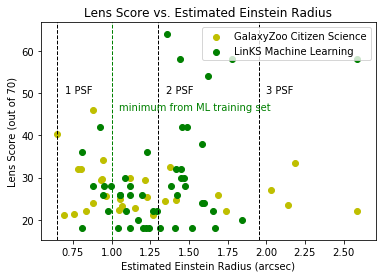

In [7]:
plt.scatter(zoo.theta_e_Ang_slide, zoo.LENS_SCORE*70,color='y',label='GalaxyZoo Citizen Science')
plt.scatter(mac.theta_e_Ang_slide, mac.SCORE,color='g',label='LinKS Machine Learning')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 50, '1 PSF')
plt.text(1.35, 50, '2 PSF')
plt.text(2, 50, '3 PSF')
plt.text(1.05, 46, 'minimum from ML training set', color = 'g')
plt.title('Lens Score vs. Estimated Einstein Radius')
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Lens Score (out of 70)")
plt.legend(loc='upper right')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/mac_zoo_theta_e_score.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/mac_zoo_theta_e_score_060920..pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


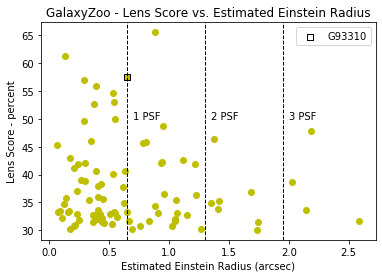

In [6]:
plt.scatter(zoo_30.theta_e_Ang_slide, zoo_30.LENS_SCORE * 100,color='Y')#,label='Zoo')
plt.scatter(zoo_30[zoo_30.GAMA_ID == 93310].theta_e_Ang_slide, 
            zoo_30[zoo_30.GAMA_ID == 93310].LENS_SCORE * 100, 
            marker = 's', color = 'none', edgecolor = 'k',
        label = 'G93310')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 50, '1 PSF')
plt.text(1.35, 50, '2 PSF')
plt.text(2, 50, '3 PSF')
#plt.text(1.05, , 'minimum from training set', color = 'g')
plt.title('GalaxyZoo - Lens Score vs. Estimated Einstein Radius')
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Lens Score - percent")
plt.legend()
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/zoo_theta_e_score_060820.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/zoo_theta_e_score_060920.pdf')

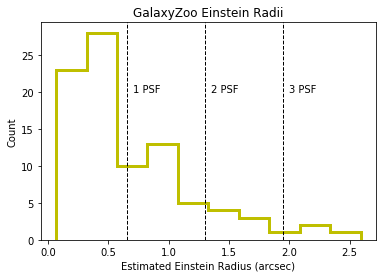

In [8]:
# Histogram of Einstein Radii
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("GalaxyZoo Einstein Radii")
plt.hist(zoo_30.theta_e_Ang_slide,bins=10,color='y',label='GZ', histtype = 'step', linewidth=3)
#plt.hist(s4tm_shu_17.theta_e_sie,bins=10,color='c',label='S4TM', histtype = 'step', linewidth=3)
#plt.hist(bells_brownstein_12.theta_e_sie,bins=10,color='k',label='BELLS', histtype = 'step', linewidth=3)
#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)
#plt.legend(loc='upper right')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.text(0.7, 20, '1 PSF')
plt.text(1.35, 20, '2 PSF')
plt.text(2, 20, '3 PSF')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/gz_theta_e.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/gz_theta_e_060920..pdf')



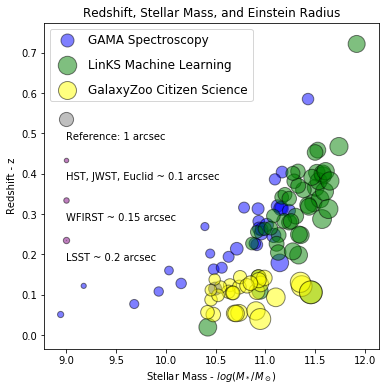

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
#ax.set_xlim(1.6, 3.1)
#ax.set_ylim(17, 21)

x1 = np.log10(spec.STELLAR_MASS)
y1 = spec.z_lens
c = spec.theta_e_Ang_slide
v1 = spec.theta_e_Ang_slide*200

x2 = np.log10(mac.STELLAR_MASS)
y2 = mac.Z
v2 = mac.theta_e_Ang_slide*200

x3 = np.log10(zoo.STELLAR_MASS)
y3 = zoo.Z
v3 = zoo.theta_e_Ang_slide*200

jwst = 0.1*200
lsst = 0.2*200
wfirst = 0.15*200
hst = 0.05

ax.scatter(x1, y1, s=v1, color='blue', marker='o', edgecolors = "k", label='GAMA Spectroscopy', alpha = 0.5)#, fillstyle = 'none')
ax.scatter(x2, y2, s=v2, color='green', marker='o', edgecolors = "k", label='LinKS Machine Learning', alpha = 0.5)
ax.scatter(x3, y3, s=v3, color='yellow', marker='o', edgecolors = "k", label='GalaxyZoo Citizen Science', alpha = 0.5)
ax.scatter(9., 0.535, s=200, color='gray', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.435, s=jwst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.335, s=wfirst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.235, s=lsst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.235, s=hst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)

plt.legend(loc='upper left', labelspacing=1.0, fontsize = 12)
#plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical',ticks=[0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4], spacing='uniform') #, anchor=(0,1.5))
#plt.cbar.set_label('Einstein Radius - arcsec', fontsize=10)
plt.text(9.,0.485,'Reference: 1 arcsec')
plt.text(9.,0.385,'HST, JWST, Euclid ~ 0.1 arcsec')
plt.text(9.,0.285,'WFIRST ~ 0.15 arcsec')
plt.text(9.,0.185,'LSST ~ 0.2 arcsec')
plt.text

plt.xlabel("Stellar Mass - $log(M_*/M_\odot)$")
plt.ylabel("Redshift - z")
plt.title("Redshift, Stellar Mass, and Einstein Radius")

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_redshift_mass_nextgen.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/theta_e_redshift_mass_nextgen_060920..pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


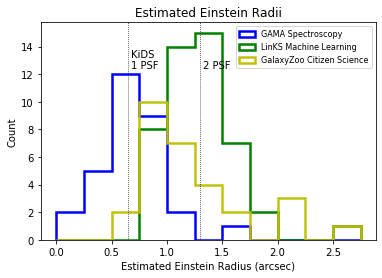

In [11]:
# Histogram of Einstein Radii
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("Estimated Einstein Radii")

#plt.ylim(0,14.5)

plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=2.5)
plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=2.5)
plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],
         color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=2.5, alpha = 0.95)
#plt.hist(slacs.theta_e_sie,bins=10,color='c',label='SLACS (Bolton-08)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.hist(s4tm.theta_e_sie,bins=10,color='m',label='S4TM (Shu-17)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.hist(bells.theta_e_sie,bins=10,color='k',label='BELLS (Brownstein-12)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.fill_betweenx(x1=0.1, x2=0.2, y=(0,15),# Fill region for false candidates
 #                facecolor="purple", # The fill color
  #               color='purple',       # The outline color
   #              alpha=0.15, # Transparency of the fill
    #            label='NextGen Resolution')

plt.legend(loc='upper right', fontsize=8)

plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='b', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
#plt.axvline(0.1, color='k', linestyle='dashed', linewidth=0.75)
#plt.axvline(0.2, color='k', linestyle='dashed', linewidth=0.75)


plt.text(0.675, 12.4, '1 PSF')
plt.text(0.675, 13.2, 'KiDS')
plt.text(1.325, 12.4, '2 PSF')
#plt.text(-0.06, 13.2, '0.1-0.2 arcsec')
#plt.text(0.125, 13.2, 'JWST')
#plt.text(0.125, 12.4, 'Euclid')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_060820.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/theta_e_060920..pdf')


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


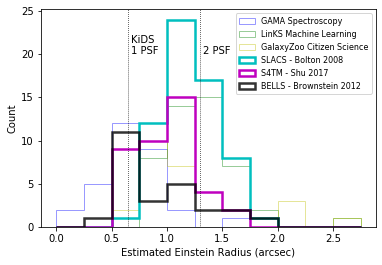

In [13]:
# Histogram of Einstein Radii
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Count")
#plt.title("Einstein Radii")
plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='b',label='GAMA Spectroscopy', histtype = 'step', linewidth=1, alpha=0.4)
plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=1, alpha=0.4)
plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=1, alpha=0.4)
plt.hist(slacs.theta_e_sie,bins=11,range=[0.0,2.75],color='c',label='SLACS - Bolton 2008', histtype = 'step', linewidth=2.5)
plt.hist(s4tm.theta_e_sie,bins=11,range=[0.0,2.75],color='m',label='S4TM - Shu 2017', histtype = 'step', linewidth=2.5)
plt.hist(bells.theta_e_sie,bins=11,range=[0.0,2.75],color='k',label='BELLS - Brownstein 2012', histtype = 'step', linewidth=2.5, alpha = 0.8)
plt.legend(loc='upper right', fontsize=8)
plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='b', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.675, 20, '1 PSF')
plt.text(0.675, 21.3, 'KiDS')
plt.text(1.325, 20, '2 PSF')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_other_surveys_060820.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/theta_e_other_surveys_060920..pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


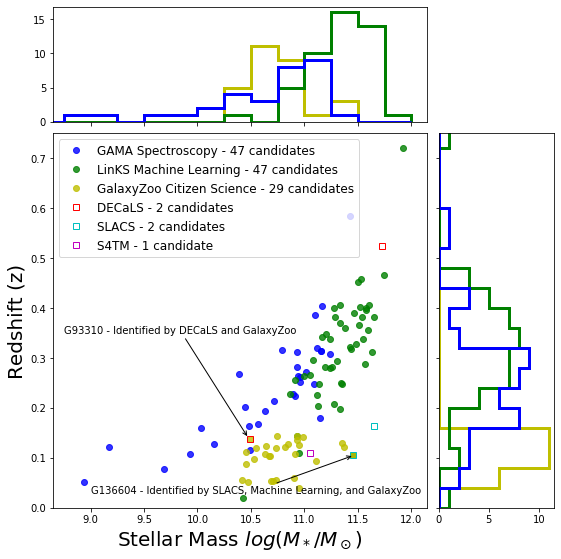

In [14]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
axScatter.set_xlim((min(np.log10(zoo.STELLAR_MASS))-0.5, max(np.log10(mac.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac.Z)-0.05, max(mac.Z)+0.05))
axScatter.plot(np.log10(spec.STELLAR_MASS), spec.z_lens, 'bo', alpha = 0.8, label='GAMA Spectroscopy - 47 candidates')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac.STELLAR_MASS), mac.Z, 'go', alpha = 0.8, label='LinKS Machine Learning - 47 candidates')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(zoo.STELLAR_MASS), zoo.Z, 'yo', alpha = 0.8, label='GalaxyZoo Citizen Science - 29 candidates')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
axScatter.plot(np.log10(decals_gama.STELLAR_MASS), decals_gama.Z, 'rs',label='DECaLS - 2 candidates', fillstyle = 'none')
axScatter.plot(np.log10(slacs_gama.STELLAR_MASS), slacs_gama.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
axScatter.plot(np.log10(s4tm_gama.STELLAR_MASS), s4tm_gama.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

#text.Annotation('G93310', xycoords='data', xytext=(9.75,0.325), xy=(10.35,0.14), arrowprops=None)
axScatter.annotate("G93310 - Identified by DECaLS and GalaxyZoo",
            xy=(10.475,0.14), xycoords='data',
            xytext=(8.75,0.35), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                           connectionstyle="arc3"),
            )
axScatter.annotate("G136604 - Identified by SLACS, Machine Learning, and GalaxyZoo",
            xy=(11.46,0.105), xycoords='data',
            xytext=(9.0,0.0285), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.max_stellar_mass_chabrier)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None)

#axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([8.65,12.15,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/121519_all_methods_medians_maxmasses_additional_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/041220_all_methods_other_surveys.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_other_surveys_060920..pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_max_mass.pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


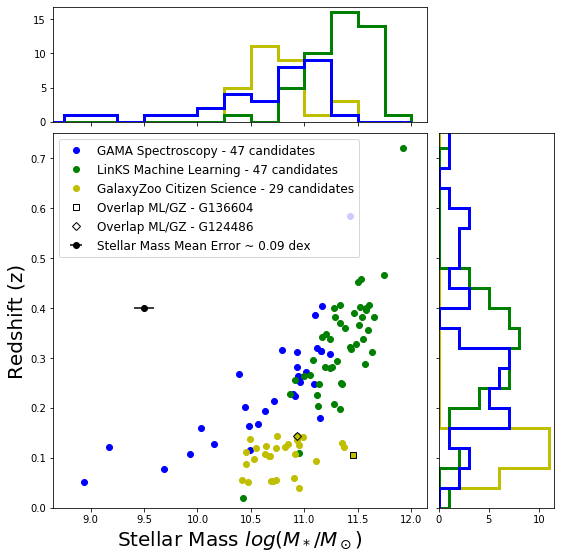

In [15]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
axScatter.set_xlim((min(np.log10(zoo.STELLAR_MASS))-0.5, max(np.log10(mac.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac.Z)-0.05, max(mac.Z)+0.05))
axScatter.plot(np.log10(spec.STELLAR_MASS), spec.z_lens, 'bo',label='GAMA Spectroscopy - 47 candidates')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac.STELLAR_MASS), mac.Z, 'go',label='LinKS Machine Learning - 47 candidates')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(zoo.STELLAR_MASS), zoo.Z, 'yo',label='GalaxyZoo Citizen Science - 29 candidates')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals.STELLAR_MASS), decals.Z, 'rs',label='DECALS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs.STELLAR_MASS), slacs.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm.STELLAR_MASS), s4tm.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

# plot two overlaps
G136604 = mac[mac.GAMA_ID == 136604]
G124486 = mac[mac.GAMA_ID == 124486]
axScatter.plot(np.log10(G136604.STELLAR_MASS), G136604.Z, 'ks', label='Overlap ML/GZ - G136604', fillstyle = 'none')
axScatter.plot(np.log10(G124486.STELLAR_MASS), G124486.Z, 'kD', label='Overlap ML/GZ - G124486', fillstyle = 'none')

#axScatter.plot(9.5,0.4, 'ko')
axScatter.errorbar(9.5, 0.4,  
                   xerr= 0.09,
                  fmt = 'o',
                   color = 'black',
                   solid_capstyle = 'round',
                  label = 'Stellar Mass Mean Error ~ 0.09 dex')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(zoo.STELLAR_MASS)-0.5, max(zoo.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([8.65,12.15,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec.z1, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/121519_all_methods_medians_maxmasses_additional_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/050420_bp_overlaps.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_overlaps_060920..pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/050420_bp_overlaps.png')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


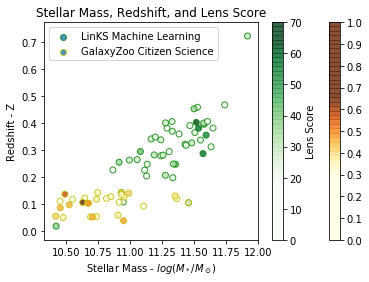

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
p1 = ax1.scatter(np.log10(mac.STELLAR_MASS), 
                mac.Z, 
                c = mac.SCORE, 
                cmap = "Greens", 
                edgecolors = 'g',
                alpha = 0.8,
                label='LinKS Machine Learning')
p2 = ax2.scatter(np.log10(zoo.STELLAR_MASS), 
                  zoo.Z, 
                  c = zoo.LENS_SCORE, 
                  cmap = "YlOrBr", 
                  edgecolors = "y",
                alpha = 0.8,
                label='GalaxyZoo Citizen Science')
plt.cbar = plt.colorbar(p2,
                        shrink=1,
                        orientation='vertical',
                       boundaries=(np.linspace(0, 1, 50)),
                       ticks = ([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])) #, anchor=(0,1.5))
plt.cbar = plt.colorbar(p1, 
                        shrink=1, 
                        orientation='vertical',
                       boundaries=(np.linspace(0, 70, 50)),
                       ticks = ([0, 10, 20, 30, 40, 50, 60, 70])) #, anchor=(0,1.5)
plt.cbar.set_label('Lens Score', fontsize=10)
plt.xlabel("Stellar Mass - $log(M_*/M_\odot)$")
plt.ylabel("Redshift - Z")
plt.title("Stellar Mass, Redshift, and Lens Score")
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/mac_zoo_scores_mass_redshift.png')
plt.legend()

plt.legend()
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/mac_zoo_scores_mass_redshift_060920..pdf')


plt.show()


In [86]:
# Opening GAMA MagPhys data from G09, G12, and G15 (DR3)
#hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/MagPhys.fits')  # open a FITS file
#hdul.verify('fix')
#magphys = hdul[1].data  # assume the first extension is a table
#print(magphys.columns)
#gamaid = magphys.CATAID # Select wanted columns
#mass = magphys.mass_stellar_best_fit
#z = magphys.Z

#gama_list = list(zip(gamaid,mass,z)) # zip to list

#gama_mass = pd.DataFrame(gama_list, columns = ['GAMA_ID','STELLAR_MASS','Z']) # create DF


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/astropy/cosmology/funcs.py:124: UserWarning: fval is not bracketed by func(zmin) and func(zmax). This means either
there is no solution, or that there is more than one solution between
zmin and zmax satisfying fval = func(z).
  zmin and zmax satisfying fval = func(z).""")
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


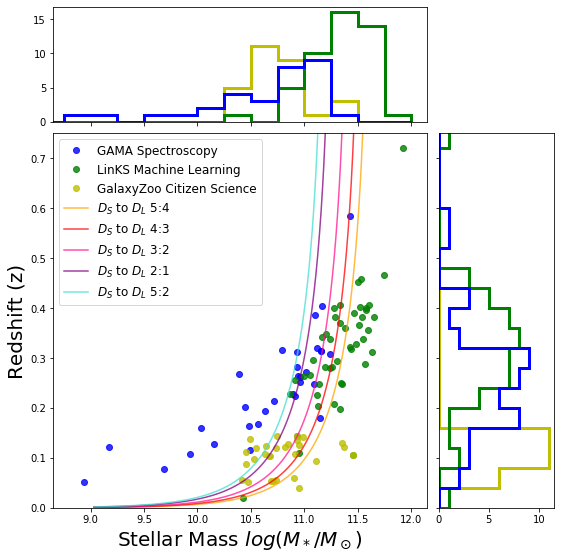

In [17]:
M_stellar = np.linspace(8**(10), 10**(11.75), 1000)
#print(M_stellar)
M = M_stellar/(0.46 - 0.13 * (np.log10(M_stellar) - 11))
#print(M)
M_prime_1_2 = 1 / (2*10**(8.09)) * M
M_prime_3_2 = 1 / (3*10**(8.09)) * M
M_prime_5_2 = 1 / ((5/3) * 10**(8.09)) * M
M_prime_4_3 = 1 / (4 * 10**(8.09)) * M
M_prime_5_4 = 1 / (5 * 10** (8.09)) * M

#print(M_prime)
z_1_2 = np.zeros(len(M))
z_3_2 = np.zeros(len(M))
z_5_2 = np.zeros(len(M))
z_4_3 = np.zeros(len(M))
z_5_4 = np.zeros(len(M))

for i in range(len(M)):
    z_1_2[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_1_2[i] * u.Mpc, zmax = 2.0)
    z_3_2[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_3_2[i] * u.Mpc, zmax = 2.0)
    z_5_2[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_5_2[i] * u.Mpc, zmax = 2.0)
    z_4_3[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_4_3[i] * u.Mpc, zmax = 2.0)
    z_5_4[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_5_4[i] * u.Mpc, zmax = 2.0)

# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
axScatter.set_xlim((min(np.log10(zoo.STELLAR_MASS))-0.5, max(np.log10(mac.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac.Z)-0.05, max(mac.Z)+0.05))


axScatter.plot(np.log10(spec.STELLAR_MASS), spec.z_lens, 'bo', alpha = 0.8, label='GAMA Spectroscopy')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac.STELLAR_MASS), mac.Z, 'go', alpha = 0.8, label='LinKS Machine Learning')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(zoo.STELLAR_MASS), zoo.Z, 'yo', alpha = 0.8, label='GalaxyZoo Citizen Science')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals.STELLAR_MASS), decals.Z, 'rs',label='DECaLS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs.STELLAR_MASS), slacs.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm.STELLAR_MASS), s4tm.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

#text.Annotation('G93310', xycoords='data', xytext=(9.75,0.325), xy=(10.35,0.14), arrowprops=None)
#axScatter.annotate("G93310 - Identified by DECaLS and GalaxyZoo",
 #           xy=(10.475,0.14), xycoords='data',
  #          xytext=(8.75,0.35), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                       connectionstyle="arc3"),
     #       )
#axScatter.annotate("G136604 - Identified by SLACS, Machine Learning, and GalaxyZoo",
 #           xy=(11.46,0.105), xycoords='data',
  #          xytext=(9.0,0.0285), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                        connectionstyle="arc3"),
     #       )
        
# fiber radius mass curves

axScatter.plot(np.log10(M_stellar), z_5_4, 
               color = 'orange', label = '$D_S$ to $D_L$ 5:4', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_4_3, 
               color = 'red', label = '$D_S$ to $D_L$ 4:3', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_3_2, 
               color = 'deeppink', label = '$D_S$ to $D_L$ 3:2', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_1_2, 
               color = 'purple', label = '$D_S$ to $D_L$ 2:1', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_5_2, 
               color = 'turquoise', label = '$D_S$ to $D_L$ 5:2', alpha = 0.75)#, linestyle = '--')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.max_stellar_mass_chabrier)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None, color = 'k',
      #            alpha = 0.5)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.fiber_radius_stellar_mass)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None,
      #            color = 'b',
       #           alpha = 0.5)



axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([8.65,12.15,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )


#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/fiber_radius_mass_curves.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/fiber_radius_mass_curves_060920.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/041220_all_methods_other_surveys.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_other_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_max_mass.pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


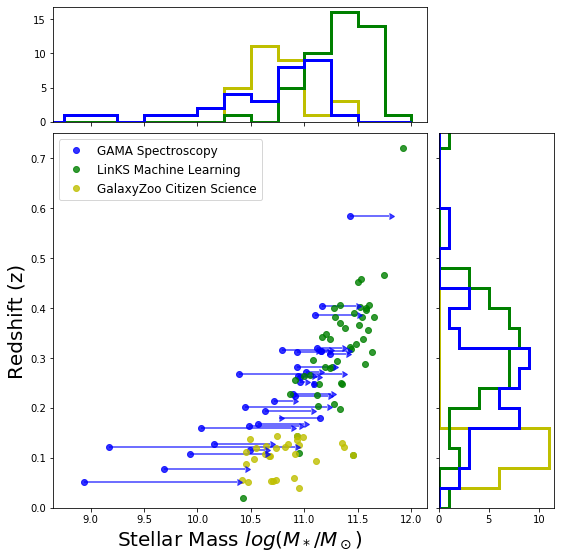

In [20]:
# REDO FIBER RADIUS MASS BEFORE RUNNING THIS!

# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
axScatter.set_xlim((min(np.log10(zoo.STELLAR_MASS))-0.5, max(np.log10(mac.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac.Z)-0.05, max(mac.Z)+0.05))


axScatter.plot(np.log10(spec.STELLAR_MASS), spec.z_lens, 'bo', alpha = 0.8, label='GAMA Spectroscopy')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac.STELLAR_MASS), mac.Z, 'go', alpha = 0.8, label='LinKS Machine Learning')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(zoo.STELLAR_MASS), zoo.Z, 'yo', alpha = 0.8, label='GalaxyZoo Citizen Science')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals.STELLAR_MASS), decals.Z, 'rs',label='DECaLS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs.STELLAR_MASS), slacs.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm.STELLAR_MASS), s4tm.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

#text.Annotation('G93310', xycoords='data', xytext=(9.75,0.325), xy=(10.35,0.14), arrowprops=None)
#axScatter.annotate("G93310 - Identified by DECaLS and GalaxyZoo",
 #           xy=(10.475,0.14), xycoords='data',
  #          xytext=(8.75,0.35), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                       connectionstyle="arc3"),
     #       )
#axScatter.annotate("G136604 - Identified by SLACS, Machine Learning, and GalaxyZoo",
 #           xy=(11.46,0.105), xycoords='data',
  #          xytext=(9.0,0.0285), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                        connectionstyle="arc3"),
     #       )
        
# fiber radius mass curves

#axScatter.plot(np.log10(M_stellar), z_5_4, 
 #              color = 'orange', label = '$D_S$ to $D_L$ 5:4', alpha = 0.75)#, linestyle = '--')
#axScatter.plot(np.log10(M_stellar), z_4_3, 
 #              color = 'red', label = '$D_S$ to $D_L$ 4:3', alpha = 0.75)#, linestyle = '--')
#axScatter.plot(np.log10(M_stellar), z_3_2, 
 #              color = 'deeppink', label = '$D_S$ to $D_L$ 3:2', alpha = 0.75)#, linestyle = '--')
#axScatter.plot(np.log10(M_stellar), z_1_2, 
 #              color = 'purple', label = '$D_S$ to $D_L$ 2:1', alpha = 0.75)#, linestyle = '--')
#axScatter.plot(np.log10(M_stellar), z_5_2, 
 #              color = 'turquoise', label = '$D_S$ to $D_L$ 5:2', alpha = 0.75)#, linestyle = '--')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.max_stellar_mass_chabrier)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None, color = 'k',
      #            alpha = 0.5)
axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
                   spec.z_lens, 
                   xerr=np.log10(spec.fiber_radius_stellar_mass)-np.log10(spec.STELLAR_MASS),
                  fmt = 'none',
                  xlolims = True,
                  label = None,
                  color = 'b',
                  alpha = 0.75)



axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([8.65,12.15,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )


#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/fiber_radius_mass_error_bars.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/fiber_radius_mass_error_bars_060920.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/041220_all_methods_other_surveys.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_other_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_max_mass.pdf')

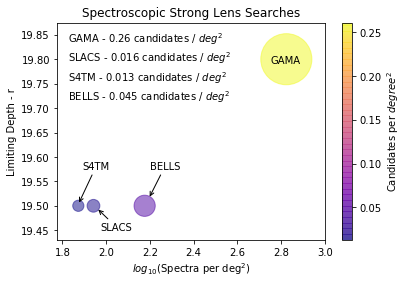

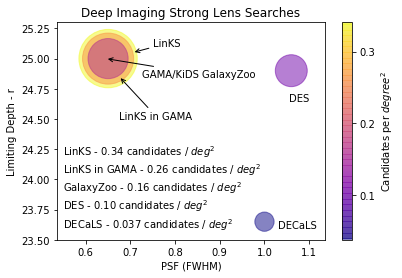

In [19]:
spectroscopic_surveys = pd.DataFrame({'SURVEY_NAME' : ['GAMA II', 'SLACS', 'S4TM', 'BELLS'],
                                     'PARENT_SURVEY' : ['GAMA', 'SDSS-DR6 MAIN and SDSS-LRG', 'SDSS-DR7', 'BOSS (SDSS-III)'],
                                      # 9380 is SDSS DR7
                                     'AREA_deg2' : [180, 8000, 9380, 1000],
                                     # 19.5 is with the nonsense.. 17.7 truly
                                     'DEPTH_r' : [19.8, 19.5, 19.5, 19.5],
                                      # GAMA equatorial from MagPhys.. I don't know how to find the others...
                                      # SDSS 700000
                                      'FIBRES' : [120114, 700000, 700000, 1500000],
                                      'SPEC_PER_SQDEG' : [667, 87.5, 74.6, 150],
                                     'CANDIDATES' : [47, 131, 118, 45],
                                     'CANDIDATES_PER_SQDEG' : [0.2611, # 47/180
                                                               0.016375, #131/8000
                                                               0.01258, #118/9380
                                                               0.04500]}, #45/10000]},
                                    )#index = [1,2,3,4])

imaging_surveys = pd.DataFrame({'SURVEY_NAME' : ['LinKS','LinKS - GAMA', 'GAMA_KiDS_GZ', 'DES', 'DECALS'],
                                     'PARENT_SURVEY' : ['KiDS DR4', 'KiDS DR4', 'KiDS', 'DES', 'DESI Legacy Imagine Surveys'],
                                'AREA_deg2' : [904, 180, 180, 5000, 9000],
                                     'DEPTH_r' : [25, 25, 25, 24.9, 23.65], #DECaLS is weighted avg b/c overlaps with 5000 of DES
                                     'PSF_PWHM' : [0.65, 0.65, 0.65, 1.06, 1.0], #DECaLS is weighted avg b/c overlaps with 5000 of DES
                                'CANDIDATES' : [308, 47, 29, 511, 335],
                                     'CANDIDATES_PER_SQDEG' : [0.3407, #308/908
                                                               0.2611, #47/180, 
                                                               0.1611, #29/180,
                                                               0.1022, #511/5000, 
                                                               0.03722 ]},#335/9000]},
                              )#index = [1,2,3,4,5])

# separate into individual surveys for plotting
# this was all poorly done...
GAMA = spectroscopic_surveys.iloc[0]
SLACS = spectroscopic_surveys.iloc[1]
S4TM = spectroscopic_surveys.iloc[2]
BELLS = spectroscopic_surveys.iloc[3]

LinKS = imaging_surveys.iloc[0]
LinKS_GAMA = imaging_surveys.iloc[1]
GalaxyZoo = imaging_surveys.iloc[2]
DES = imaging_surveys.iloc[3]
DECaLS = imaging_surveys.iloc[4]

# spectroscopic surveys

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(1.775, 3.0)
ax.set_ylim(19.43, 19.875)

x = np.log10(spectroscopic_surveys.SPEC_PER_SQDEG)
y = spectroscopic_surveys.DEPTH_r
c = spectroscopic_surveys.CANDIDATES_PER_SQDEG
v = spectroscopic_surveys.CANDIDATES_PER_SQDEG*10000

p = ax.scatter(x, y, s=v, c=c, cmap = "plasma", alpha = 0.5)
plt.cbar = plt.colorbar(p, 
                        shrink=1, 
                        orientation='vertical',
                        ticks=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4], 
                        spacing='uniform') #, anchor=(0,1.5))
plt.cbar.set_label('Candidates per $degree^2$', fontsize=10)
plt.xlabel("$log_{10}$(Spectra per deg$^2$)")
plt.ylabel("Limiting Depth - r")
plt.title("Spectroscopic Strong Lens Searches")
#plt.legend()
plt.text(2.75, 19.7925, "GAMA")
#plt.text(1.8, 19.53, "SLACS")
#plt.text(2.05, 19.53, "S4TM")
#plt.text(1.85, 19.45, "BELLS")

plt.text(1.825, 19.835, 'GAMA - 0.26 candidates / $deg^{2}$')
plt.text(1.825, 19.795, 'SLACS - 0.016 candidates / $deg^{2}$')
plt.text(1.825, 19.755, 'S4TM - 0.013 candidates / $deg^{2}$')
plt.text(1.825, 19.715, 'BELLS - 0.045 candidates / $deg^{2}$')


ax.annotate("BELLS",
            xy=(2.195,19.515), xycoords='data',
            xytext=(2.2,19.575), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("SLACS",
            xy=(1.9575,19.495), xycoords='data',
            xytext=(1.975,19.45), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("S4TM",
            xy=(1.8725,19.503), xycoords='data',
            xytext=(1.8925,19.575), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )


#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/spectroscopy_surveys_plot_060920.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/spectroscopy_surveys_plot.png')

plt.show()

# imaging surveys

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_xlim(0.7, 1.2)
ax.set_ylim(23.5, 25.3)

x = imaging_surveys.PSF_PWHM
y = imaging_surveys.DEPTH_r
c = imaging_surveys.CANDIDATES_PER_SQDEG
v = imaging_surveys.CANDIDATES_PER_SQDEG*10000

p = ax.scatter(x, y, c=c, s=v, cmap = "plasma", alpha = 0.5)
plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical',ticks=[0.1,0.2,0.3,0.4], spacing='uniform') #, anchor=(0,1.5))
plt.cbar.set_label('Candidates per $degree^2$', fontsize=10)
plt.xlabel("PSF (FWHM)")
plt.ylabel("Limiting Depth - r")
plt.title("Deep Imaging Strong Lens Searches")
#plt.legend()

plt.text(1.055, 24.65, "DES")
plt.text(1.03, 23.6, "DECaLS")

ax.annotate("GAMA/KiDS GalaxyZoo",
            xy=(0.645,25.0), xycoords='data',
            xytext=(0.725,24.85), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("LinKS in GAMA",
            xy=(0.675,24.85), xycoords='data',
            xytext=(0.675,24.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("LinKS",
            xy=(0.705,25.05), xycoords='data',
            xytext=(0.75,25.1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.text(0.55, 24.2, 'LinKS - 0.34 candidates / $deg^{2}$')
plt.text(0.55, 24.05, 'LinKS in GAMA - 0.26 candidates / $deg^{2}$')
plt.text(0.55, 23.9, 'GalaxyZoo - 0.16 candidates / $deg^{2}$')
plt.text(0.55, 23.75, 'DES - 0.10 candidates / $deg^{2}$')
plt.text(0.55, 23.6, 'DECaLS - 0.037 candidates / $deg^{2}$')


#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/imaging_surveys_060920.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/imaging_surveys.png')

plt.show()

In [21]:
zoo

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  GAMA_ID         RA      DEC  \
0            0             0               0   511867  216.38846 -1.11396   
1            1             1               1   485873  217.75015 -1.80042   
2            2             2               2    70022  178.02218  0.07392   
3            3             3               3   170898  176.46563 -2.33643   
4            4             4               4   184275  175.91698 -1.44119   
5            5             5               5    84050  175.79849  0.47814   
6            7             7               7    55245  181.07958 -0.31553   
7            8             8               8    70282  179.40308  0.12562   
8            9             9               9   185451  180.28326 -1.61006   
9           10            10              10   124486  179.72998 -2.51919   
10          11            11              11   106562  216.62566  0.84498   
11          12            12              12   593852  218.07820 -0.03958   
12          14            14              14   568545  215.49570 -0.59009   
13          15            15              15   460645  213.23176 -1.72100   
14          16            16              16    93803  222.48917  0.55835   
15          17            17              17    93310  219.92276  0.50731   
16          18            18              18   136604  175.87349 -1.74167   
17          19            19              19   600421  135.49058  0.28417   
18          20            20              20   574423  135.75994 -0.20038   
19          21            21              21   324764  137.20387  1.72633   
20          22            22              22   218733  140.29763  0.88594   
21          24            24              24   342699  216.90174  2.13250   
22          25            25              25   363319  218.85395  2.56676   
23          26            26              26   418788  137.69141  2.74717   
24          28            28              28   422228  129.93613  2.59097   
25          29            29              29   196837  132.90975 -0.69973   
26          31            31              31  3632594  138.25246 -0.95549   
27          32            32              32  3578853  130.98196 -1.62032   
28          35            35              35   238271  213.72842  1.57878   

    LENS_SCORE  STELLAR_MASS       Z    TOTAL_MASS   theta_e  theta_e_H0  \
0     0.352229  5.459000e+10  0.0550  1.399744e+11  1.595680    1.595680   
1     0.349456  4.908000e+10  0.0539  1.258462e+11  1.528370    1.528370   
2     0.368109  8.046000e+10  0.0599  2.063077e+11  1.856296    1.856296   
3     0.336096  2.319000e+11  0.1215  5.946154e+11  2.212752    2.212752   
4     0.317262  4.411000e+10  0.1237  1.131026e+11  0.956432    0.956432   
5     0.365758  5.471000e+10  0.1190  1.402821e+11  1.086001    1.086001   
6     0.314054  1.274000e+11  0.0936  3.266667e+11  1.868604    1.868604   
7     0.655352  4.256000e+10  0.1074  1.091282e+11  1.008252    1.008252   
8     0.302985  8.222000e+10  0.1079  2.108205e+11  1.398133    1.398133   
9     0.426190  8.541000e+10  0.1435  2.190000e+11  1.235660    1.235660   
10    0.363876  8.985000e+10  0.1268  2.303846e+11  1.348249    1.348249   
11    0.386318  2.251000e+11  0.1308  5.771795e+11  2.101137    2.101137   
12    0.355013  2.998000e+10  0.0510  7.687180e+10  1.228008    1.228008   
13    0.307076  3.549000e+10  0.1192  9.100000e+10  0.873948    0.873948   
14    0.477719  8.894000e+10  0.0398  2.280513e+11  2.394294    2.394294   
15    0.575139  3.094000e+10  0.1377  7.933333e+10  0.759213    0.759213   
16    0.316451  2.866000e+11  0.1060  7.348718e+11  2.633636    2.633636   
17    0.420189  2.621000e+10  0.0565  6.720513e+10  1.090887    1.090887   
18    0.464337  5.079000e+10  0.0536  1.302308e+11  1.559112    1.559112   
19    0.422757  4.647000e+10  0.1044  1.191538e+11  1.068579    1.068579   
20    0.419586  9.773000e+10  0.1415  2.505898e+11  1.331086    1.331086   
21    0.457088  2.845

Empty DataFrame
Columns: [Unnamed: 0, GAMA_ID, RA, DEC, LENS_SCORE, STELLAR_MASS, Z, NONE, RING, LENS, IRREGULAR, OTHER, DUST_LANE, OVERLAPPING, DL, SOURCE_GAMA_ID, SOURCE_Z, EINSTEIN_RADIUS]
Index: []

In [30]:
# Opening Galaxy Zoo data
hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/galaxy_zoo_gama_cleaned.fits')  # open a FITS file
hdul.verify('fix')
galaxyzoo = hdul[1].data  # assume the first extension is a table
print(galaxyzoo.columns)

# Creating new DataFrame of GAMA ID and all oddtype scores

survey_id = galaxyzoo.survey_id
survey_id_int = [int(survey_id) for survey_id in survey_id]
none = galaxyzoo.oddtype_none_frac
ring = galaxyzoo.oddtype_ring_frac
lens = galaxyzoo.oddtype_lens_or_arc_frac
irregular = galaxyzoo.oddtype_irregular_frac
other = galaxyzoo.oddtype_other_frac
dust_lane = galaxyzoo.oddtype_dust_lane_frac
overlapping = galaxyzoo.oddtype_overlapping_frac

zoo_oddtype_data = list(zip(survey_id_int, none, ring, lens, irregular, other, dust_lane, overlapping))

zoo_oddtype_scores = pd.DataFrame(galaxyzoo_oddtype_data, columns = ['GAMA_ID', 'NONE', 'RING', 'LENS', 'IRREGULAR', 'OTHER', 'DUST_LANE', 'OVERLAPPING'])

#zoo_with_all_scores = pd.merge(zoo_lens_with_mass, galaxyzoo_oddtype_scores, how = 'outer', on = 'GAMA_ID')

zoo_oddtype_scores

ColDefs(
    name = 'region'; format = '6A'
    name = 'subject_id'; format = '24A'
    name = 'survey_id'; format = '7A'
    name = 'zooniverse_id'; format = '10A'
    name = 'features_total'; format = 'D'
    name = 'edgeon_total'; format = 'D'
    name = 'bar_total'; format = 'D'
    name = 'spiral_total'; format = 'D'
    name = 'bulge_total'; format = 'D'
    name = 'spiralwinding_total'; format = 'D'
    name = 'spiralnumber_total'; format = 'D'
    name = 'bulgeshape_total'; format = 'D'
    name = 'round_total'; format = 'D'
    name = 'mergers_total'; format = 'D'
    name = 'oddtype_total'; format = 'D'
    name = 'discuss_total'; format = 'D'
    name = 'odd_total'; format = 'D'
    name = 'features_smooth_frac'; format = 'D'
    name = 'features_features_frac'; format = 'D'
    name = 'features_star_or_artifact_frac'; format = 'D'
    name = 'edgeon_yes_frac'; format = 'D'
    name = 'edgeon_no_frac'; format = 'D'
    name = 'bar_bar_frac'; format = 'D'
    name = 'bar_no_b

GAMA_ID      NONE      RING      LENS  IRREGULAR     OTHER  DUST_LANE  \
0       598860  0.898246  0.063116  0.000000   0.000000  0.038638   0.000000   
1       598875  0.811858  0.000000  0.000000   0.000000  0.188142   0.000000   
2       598877  0.886759  0.000000  0.000000   0.024099  0.057373   0.000000   
3       598888  0.565808  0.082877  0.000000   0.165754  0.102683   0.082877   
4       598889  0.362303  0.000000  0.000000   0.520334  0.070634   0.000000   
...        ...       ...       ...       ...        ...       ...        ...   
49846   240618  0.818960  0.018366  0.000000   0.081337  0.081337   0.000000   
49847   240619  0.550684  0.072905  0.072905   0.145809  0.084792   0.000000   
49848   240629  0.881754  0.000000  0.000000   0.000000  0.118058   0.000188   
49849   240630  0.002974  0.000000  0.011731   0.576581  0.308468   0.011731   
49850   819716  1.000000  0.000000  0.000000   0.000000  0.000000   0.000000   

       OVERLAPPING  
0         0.000000  
1         0.000000  
2         0.031770  
3         0.000000  
4         0.046729  
...            ...  
49846     0.000000  
49847     0.072905  
49848     0.000000  
49849     0.088516  
49850     0.000000  

[49851 rows x 8 columns]

In [42]:
zoo_deep = zoo[zoo.GAMA_ID.isin(zoo_oddtype_scores[(zoo_oddtype_scores.LENS > zoo_oddtype_scores.NONE)].GAMA_ID)]

In [43]:
zoo_deep

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  GAMA_ID         RA      DEC  \
1            1             1               1   485873  217.75015 -1.80042   
5            5             5               5    84050  175.79849  0.47814   
6            7             7               7    55245  181.07958 -0.31553   
7            8             8               8    70282  179.40308  0.12562   
8            9             9               9   185451  180.28326 -1.61006   
9           10            10              10   124486  179.72998 -2.51919   
11          12            12              12   593852  218.07820 -0.03958   
15          17            17              17    93310  219.92276  0.50731   
16          18            18              18   136604  175.87349 -1.74167   
17          19            19              19   600421  135.49058  0.28417   
18          20            20              20   574423  135.75994 -0.20038   
19          21            21              21   324764  137.20387  1.72633   
21          24            24              24   342699  216.90174  2.13250   
22          25            25              25   363319  218.85395  2.56676   
23          26            26              26   418788  137.69141  2.74717   
27          32            32              32  3578853  130.98196 -1.62032   

    LENS_SCORE  STELLAR_MASS       Z    TOTAL_MASS   theta_e  theta_e_H0  \
1     0.349456  4.908000e+10  0.0539  1.258462e+11  1.528370    1.528370   
5     0.365758  5.471000e+10  0.1190  1.402821e+11  1.086001    1.086001   
6     0.314054  1.274000e+11  0.0936  3.266667e+11  1.868604    1.868604   
7     0.655352  4.256000e+10  0.1074  1.091282e+11  1.008252    1.008252   
8     0.302985  8.222000e+10  0.1079  2.108205e+11  1.398133    1.398133   
9     0.426190  8.541000e+10  0.1435  2.190000e+11  1.235660    1.235660   
11    0.386318  2.251000e+11  0.1308  5.771795e+11  2.101137    2.101137   
15    0.575139  3.094000e+10  0.1377  7.933333e+10  0.759213    0.759213   
16    0.316451  2.866000e+11  0.1060  7.348718e+11  2.633636    2.633636   
17    0.420189  2.621000e+10  0.0565  6.720513e+10  1.090887    1.090887   
18    0.464337  5.079000e+10  0.0536  1.302308e+11  1.559112    1.559112   
19    0.422757  4.647000e+10  0.1044  1.191538e+11  1.068579    1.068579   
21    0.457088  2.845000e+10  0.0876  7.294872e+10  0.912766    0.912766   
22    0.457532  3.343000e+10  0.0985  8.571795e+10  0.933084    0.933084   
23    0.343063  5.578000e+10  0.1436  1.430256e+11  0.998234    0.998234   
27    0.319461  6.537000e+10  0.1221  1.676154e+11  1.171931    1.171931   

    theta_e_Ang      f_dm  theta_e_H0_slide  theta_e_Ang_slide  
1      1.527035  0.499818          1.349573           1.348395  
5      1.081179  0.505949          0.964887           0.960603  
6      1.863550  0.553672          1.746717           1.741993  
7      1.004631  0.491770          0.883225           0.880053  
8      1.393063  0.528947          1.272172           1.267559  
9      1.227565  0.531096          1.126910           1.119528  
11     2.089785  0.585809          2.038855           2.027839  
15     0.754649  0.473768          0.653593           0.649663  
16     2.624429  0.599446          2.598708           2.589623  
17     1.089838  0.464401          0.930877           0.929982  
18     1.557765  0.501751          1.379388           1.378197  
19     1.064959  0.496732          0.940675           0.937488  
21     0.910612  0.469031          0.782271           0.780425  
22     0.930280  0.478138          0.806631           0.804208  
23     0.991686  0.507042          0.887892           0.882067  
27     1.166442  0.515999          1.051989           1.047062